/Users/lizhihao/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lizhihao/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lizhihao/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lizhihao/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

samples: 14058 	 features: 1
----------------------------------------------------------------------
cross validation result:
                            0            1          2         3          4  \
BayesianRidge    -5088.939529  -400.942678 -57.027087 -0.010606  -6.774934   
LinearRegression -5089.754514  -400.877189 -57.025838 -0.010613  -6.774860   
ElasticNet       -5089.489002  -400.895754 -57.026237 -0.010611  -6.774932   
SVR              -2987.484175 -2111.091374 -27.674393 -1.274340 -20.558920   
GBR                 -6.052309    -0.316243  -0.407349 -1.855661  -0.492361   

                         5  
BayesianRidge    -1.360952  
LinearRegression -1.361200  
ElasticNet       -1.361111  
SVR              -7.933533  
GBR              -0.234635  
----------------------------------------------------------------------
regression metrics:
                        ev       mae         mse        r2
BayesianRidge     0.637761  5.558399   49.954678  0.637761
LinearRegression  0.637

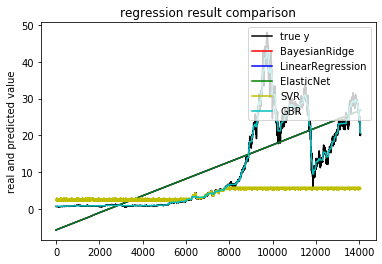

In [42]:
# 导入库
import numpy as np  # numpy库
from sklearn.linear_model import BayesianRidge, LinearRegression, ElasticNet  # 批量导入要实现的回归算法
from sklearn.svm import SVR  # SVM中的回归算法
from sklearn.ensemble.gradient_boosting import GradientBoostingRegressor  # 集成算法
from sklearn.model_selection import cross_val_score  # 交叉检验
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score  # 批量导入指标算法
import pandas as pd  # 导入pandas
import matplotlib.pyplot as plt  # 导入图形展示库
# 数据准备

df = np.loadtxt('ge.us.txt', delimiter = "," , usecols=(0) , dtype='datetime64[us]')  # 读取数据文件
df_2 = np.loadtxt('ge.us.txt', delimiter = "," , usecols=(4) , dtype=float)
#df = df.drop(['Open','High','Low','Volume','OpenInt'],axis=1)
#df = df.fillna(df.bfill())
#df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
#df.index = df['Date']
raw_data = df
# 分割自变量
x = df
y = df_2  # 分割因变量
x = x.reshape(-1,1)
y = y.reshape(-1,1)
x = x.astype('datetime64[D]').astype(float)


# 训练回归模型
n_folds = 6  # 设置交叉检验的次数
model_br = BayesianRidge()  # 建立贝叶斯岭回归模型对象
model_lr = LinearRegression()  # 建立普通线性回归模型对象
model_etc = ElasticNet()  # 建立弹性网络回归模型对象
model_svr = SVR()  # 建立支持向量机回归模型对象
model_gbr = GradientBoostingRegressor()  # 建立梯度增强回归模型对象
model_names = ['BayesianRidge', 'LinearRegression', 'ElasticNet', 'SVR', 'GBR']  # 不同模型的名称列表
model_dic = [model_br, model_lr, model_etc, model_svr, model_gbr]  # 不同回归模型对象的集合
cv_score_list = []  # 交叉检验结果列表
pre_y_list = []  # 各个回归模型预测的y值列表
for model in model_dic:  # 读出每个回归模型对象
    scores = cross_val_score(model, x, y, cv=n_folds)  # 将每个回归模型导入交叉检验模型中做训练检验
    cv_score_list.append(scores)  # 将交叉检验结果存入结果列表
    pre_y_list.append(model.fit(x, y).predict(x))  # 将回归训练中得到的预测y存入列表
# 模型效果指标评估
n_samples, n_features = x.shape  # 总样本量,总特征数
model_metrics_name = [explained_variance_score, mean_absolute_error, mean_squared_error, r2_score]  # 回归评估指标对象集
model_metrics_list = []  # 回归评估指标列表
for i in range(5):  # 循环每个模型索引
    tmp_list = []  # 每个内循环的临时结果列表
    for m in model_metrics_name:  # 循环每个指标对象
        tmp_score = m(y, pre_y_list[i])  # 计算每个回归指标结果
        tmp_list.append(tmp_score)  # 将结果存入每个内循环的临时结果列表
    model_metrics_list.append(tmp_list)  # 将结果存入回归评估指标列表
df1 = pd.DataFrame(cv_score_list, index=model_names)  # 建立交叉检验的数据框
df2 = pd.DataFrame(model_metrics_list, index=model_names, columns=['ev', 'mae', 'mse', 'r2'])  # 建立回归指标的数据框
print ('samples: %d \t features: %d' % (n_samples, n_features))  # 打印输出样本量和特征数量
print (70 * '-')  # 打印分隔线
print ('cross validation result:')  # 打印输出标题
print (df1)  # 打印输出交叉检验的数据框
print (70 * '-')  # 打印分隔线
print ('regression metrics:')  # 打印输出标题
print (df2)  # 打印输出回归指标的数据框
print (70 * '-')  # 打印分隔线
print ('short name \t full name')  # 打印输出缩写和全名标题
print ('ev \t explained_variance')
print ('mae \t mean_absolute_error')
print ('mse \t mean_squared_error')
print ('r2 \t r2')
print (70 * '-')  # 打印分隔线
# 模型效果可视化
plt.figure()  # 创建画布
plt.plot(np.arange(x.shape[0]), y, color='k', label='true y')  # 画出原始值的曲线
color_list = ['r', 'b', 'g', 'y', 'c']  # 颜色列表
linestyle_list = ['-', '.', 'o', 'v', '*']  # 样式列表
for i, pre_y in enumerate(pre_y_list):  # 读出通过回归模型预测得到的索引及结果
    plt.plot(np.arange(x.shape[0]), pre_y_list[i], color_list[i], label=model_names[i])  # 画出每条预测结果线
plt.title('regression result comparison')  # 标题
plt.legend(loc='upper right')  # 图例位置
plt.ylabel('real and predicted value')  # y轴标题
plt.show()  # 展示图像
# 模型应用
#print ('regression prediction')
#new_point_set = [[1.05393, 0., 8.14, 0., 0.538, 5.935, 29.3, 4.4986, 4., 307., 21., 386.85, 6.58],
                 #[0.7842, 0., 8.14, 0., 0.538, 5.99, 81.7, 4.2579, 4., 307., 21., 386.75, 14.67],
                 #[0.80271, 0., 8.14, 0., 0.538, 5.456, 36.6, 3.7965, 4., 307., 21., 288.99, 11.69],
                 #[0.7258, 0., 8.14, 0., 0.538, 5.727, 69.5, 3.7965, 4., 307., 21., 390.95, 11.28]]  # 要预测的新数据集
#for i, new_point in enumerate(new_point_set):  # 循环读出每个要预测的数据点
    #new_pre_y = model_gbr.predict(new_point)  # 使用GBR进行预测
    #print ('predict for new point %d is:  %.2f' % (i + 1, new_pre_y))  # 打印输出每个数据点的预测信息

In [38]:
import numpy as np  # numpy库
import pandas as pd  # 导入pandas

df = np.loadtxt('ge.us.txt', delimiter = "," , usecols=(0) , dtype='datetime64[us]')  
df_2 = np.loadtxt('ge.us.txt', delimiter = "," , usecols=(4) , dtype=float)

x = df
y = df_2

x = x.reshape(-1,1)
y = y.reshape(-1,1)

print(x.shape)
print(y.shape)

(14058, 1)
(14058, 1)
